In [300]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [3]:
D = 10

In [104]:
a = np.zeros(5)
test = np.random.standard_normal(5)
test2 = np.random.standard_normal(5)

In [9]:
def create_vector(dim):
    return np.random.normal(size=dim)

In [86]:
def create_matrix(dim):
    a = None
    for _ in range(dim):
        v = create_vector(dim)
        if a is None:
            a = v
            continue
        a = np.column_stack((a,v))

    return a

In [283]:
c = create_vector(D)

In [301]:
A = create_matrix(D)
Q = np.matmul(A.T, A)
xstar = np.matmul(np.linalg.inv(Q), c)
xoriginal = np.random.standard_normal(size=D)

In [302]:
alpha = 0.01

In [303]:
def gradient_F(x):
    return np.matmul(Q,x) - c

In [304]:
def angle(xnew, x):
    a = np.matmul((xnew - x),(xstar - x))
    mag = np.linalg.norm(xnew-x)*np.linalg.norm(xstar-x)
    return a/mag

In [305]:
x = copy.deepcopy(xoriginal)
y = []
angle_y = []
for i in range(10000):
    xnew = x - alpha*gradient_F(x)
    angle_y.append(angle(xnew, x))
    x = xnew
    error = np.linalg.norm(x - xstar)
    y.append(error)

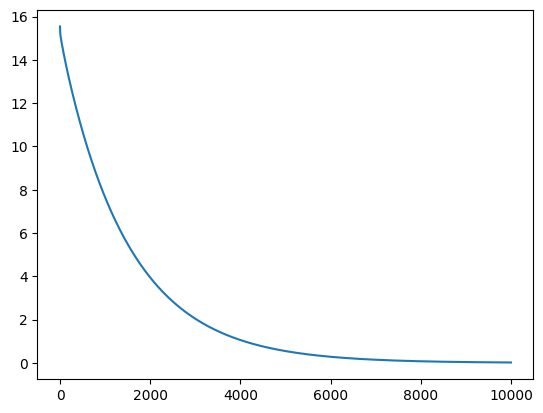

In [306]:
plt.plot(y)
plt.show()

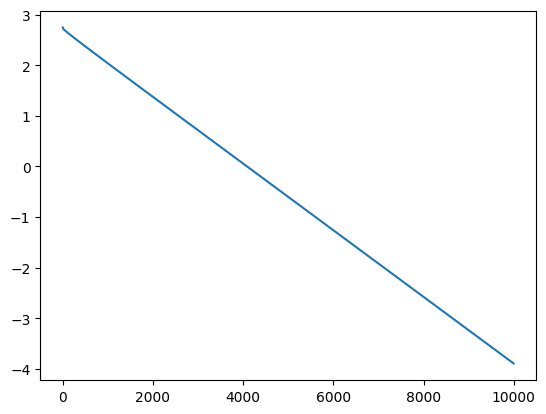

In [307]:
plt.plot(np.log(y))
plt.show()

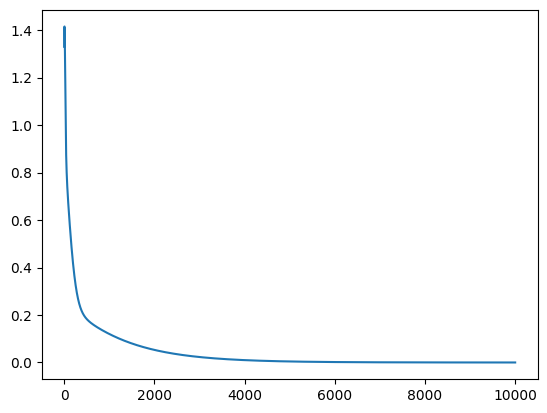

In [308]:
plt.plot(np.arccos(angle_y))
plt.show()

In [309]:
def optimal_stepsize(x):
    p = gradient_F(x)
    numerator = np.matmul(p,p)
    tmp = np.matmul(p,Q)
    denominator = np.matmul(tmp,p)
    return (2*numerator/denominator) - 0.0000001

In [310]:
x = copy.deepcopy(xoriginal)
y = []
angle_y = []
for i in range(10000):
    alpha = optimal_stepsize(x)
    xnew = x - alpha*gradient_F(x)
    angle_y.append(angle(xnew, x))
    x = xnew
    error = np.linalg.norm(x - xstar)
    y.append(error)

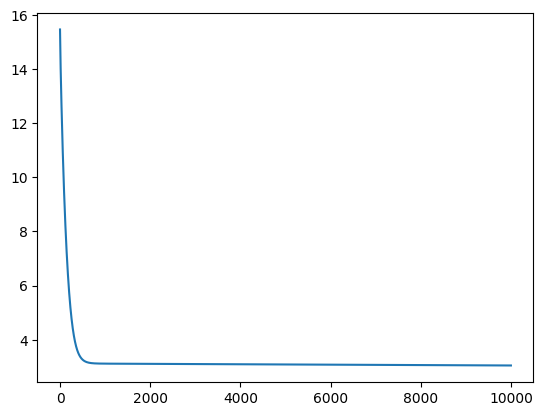

In [311]:
plt.plot(y)
plt.show()

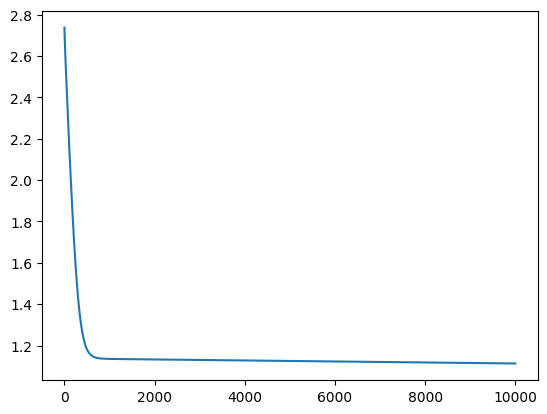

In [312]:
plt.plot(np.log(y))
plt.show()

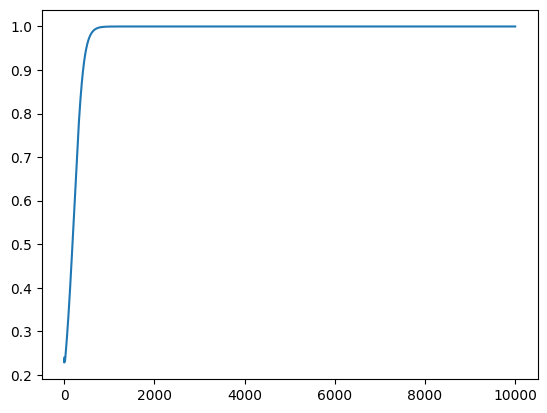

In [314]:
plt.plot((angle_y))
plt.show()